
# How Bad Did It Shake?  Ordinal modelling of earthquake damages
### Patricio Hernandez Senosiain
---


## Contents:

>[1 - Introduction](#1---Introduction)
>
>[2 - Imports](#2---Imports)
>
>[3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
>
>[4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
>
>[5 - Modelling](#5---Modelling)
>
>[6 - Conclusion](#6---Conclusion)
>


## 1 - Introduction

## 2 - Imports

In [1]:
# Importing libraries and modules

# Convergence warning disabling
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

# Scikit learn - preprocessing modules
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Scikit learn - model evaluation modules
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Scikit learn - models
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Plotly
import plotly.express as px

# Pandas and Numpy - data handling
import pandas as pd
import numpy as np

# Matplotlib and Seaborn - visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted'))


simplefilter("ignore", category=ConvergenceWarning)

## 3 - Data retrieval and exploratory analysis

### 3.1 - Data retrieval

In [2]:
train_features = pd.read_csv('data/train_values.csv')
train_target = pd.read_csv('data/train_labels.csv')


#### **NOTES FROM (3.1):**

* (Notes)

### 3.2 - General overview

In [3]:
print('Features data:')
train_features.info(verbose=False)
print('')
print('Target data:')
train_target.info(verbose=False)

Features data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Columns: 39 entries, building_id to has_secondary_use_other
dtypes: int64(31), object(8)
memory usage: 77.5+ MB

Target data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Columns: 2 entries, building_id to damage_grade
dtypes: int64(2)
memory usage: 4.0 MB


In [4]:
train_features.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_target.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [6]:
data = train_features.merge(train_target, on='building_id' )
data = data.drop(columns='building_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 


#### **NOTES FROM (3.2):**

* (Notes)

It is necessary to further classify features based on their statistical data types. With the aid of the [data description section](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/), we classified the features as follows:


#### **FEATURE CLASSIFICATION:**
|**Categorical**                            |**Count**               |**Continuous**      |
|-------------------------------------------|------------------------| -------------------|
|`land_surface_condition`                   |`count_floors_pre_eq`   |`geo_level_1_id`    |
|`foundation_type`                          |`age`                   |`geo_level_2_id`    |
|`roof_type`                                |`count_families`        |`geo_level_3_id`    |
|`ground_floor_type`                        |                        |`area_percentage`   |
|`other_floor_type`                         |                        |`height_percentage` |
|`position`                                 |                        |                    | 
|`plan_configuration`                       |                        |                    |
|`has_superstructure_adobe_mud`             |                        |                    |
|`has_superstructure_mud_mortar_stone`      |                        |                    |
|`has_superstructure_stone_flag`            |                        |                    |
|`has_superstructure_cement_mortar_stone`   |                        |                    |
|`has_superstructure_mud_mortar_brick`      |                        |                    |
|`has_superstructure_cement_mortar_brick`   |                        |                    |
|`has_superstructure_timber`                |                        |                    |
|`has_superstructure_bamboo`                |                        |                    |
|`has_superstructure_rc_non_engineered`     |                        |                    |
|`has_superstructure_rc_engineered`         |                        |                    |
|`has_superstructure_other`                 |                        |                    |
|`legal_ownership_status`                   |                        |                    |
|`has_secondary_use`                        |                        |                    |
|`has_secondary_use_agriculture`            |                        |                    |
|`has_secondary_use_hotel`                  |                        |                    |
|`has_secondary_use_rental`                 |                        |                    |
|`has_secondary_use_institution`            |                        |                    |
| `has_secondary_use_school`                |                        |                    |
|`has_secondary_use_industry`               |                        |                    |
|`has_secondary_use_health_post`            |                        |                    |
|`has_secondary_use_gov_office`             |                        |                    |
|`has_secondary_use_use_police`             |                        |                    |
|`has_secondary_use_other`                  |                        |                    |



In [7]:
cont_feats = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'area_percentage', 'height_percentage']
count_feats = ['count_floors_pre_eq', 'age', 'count_families']
cat_feats = data.drop(columns=cont_feats+count_feats).columns.tolist()
cat_feats.remove('damage_grade')

### 3.3 - Distribution of target variable

In [8]:
#Summary statistics for target variable
data['damage_grade'].describe()

count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

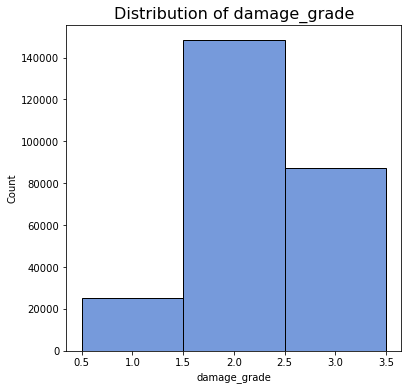

In [9]:
# Plotting distribution of values for target variable
f, axs = plt.subplots(figsize=(6, 6))
sns.histplot(data, x='damage_grade', color=standard_palette[0], fill=True, discrete=True, ax=axs)
plt.title('Distribution of damage_grade', size=16)
plt.show()


#### **NOTES FROM (3.3):**

* (Notes)

### 3.4 - Distribution of continuous features

In [10]:
data[cont_feats].describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,area_percentage,height_percentage
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,8.018051,5.434365
std,8.033617,412.710734,3646.369645,4.392231,1.918418
min,0.000000,0.000000,0.000000,1.000000,2.000000
25%,7.000000,350.000000,3073.000000,5.000000,4.000000
50%,12.000000,702.000000,6270.000000,7.000000,5.000000
75%,21.000000,1050.000000,9412.000000,9.000000,6.000000
max,30.000000,1427.000000,12567.000000,100.000000,32.000000


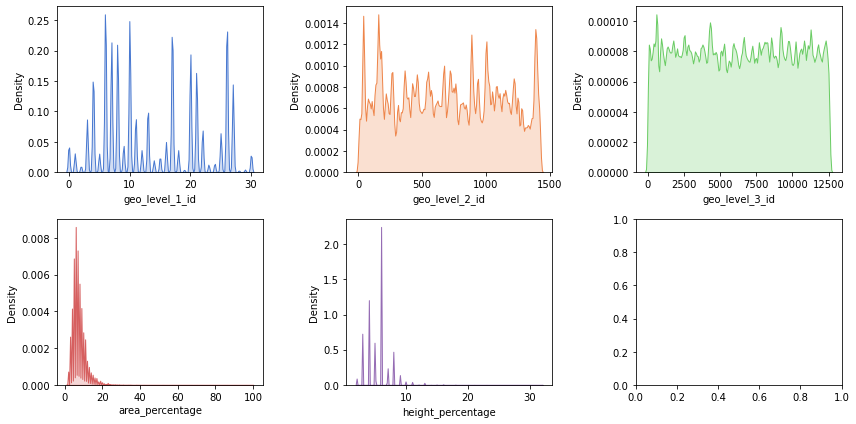

In [11]:
# Plotting distribution of data for continuous features
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
for i in range(len(cont_feats)):
    sns.kdeplot(data[cont_feats].iloc[:, i].dropna(), 
                ax=axs[i//3, i % 3],
                color=standard_palette[i], 
                fill=True, 
                bw_adjust=0.2)

plt.tight_layout()


#### **NOTES FROM (3.4):**

* Log-transform is required for `area_percentage` to reduce skewness.

### 3.5 - Distribution of count features

In [12]:
data[count_feats].describe()

,count_floors_pre_eq,age,count_families
count,260601.000000,260601.000000,260601.000000
mean,2.129723,26.535029,0.983949
std,0.727665,73.565937,0.418389
min,1.000000,0.000000,0.000000
25%,2.000000,10.000000,1.000000
50%,2.000000,15.000000,1.000000
75%,2.000000,30.000000,1.000000
max,9.000000,995.000000,9.000000


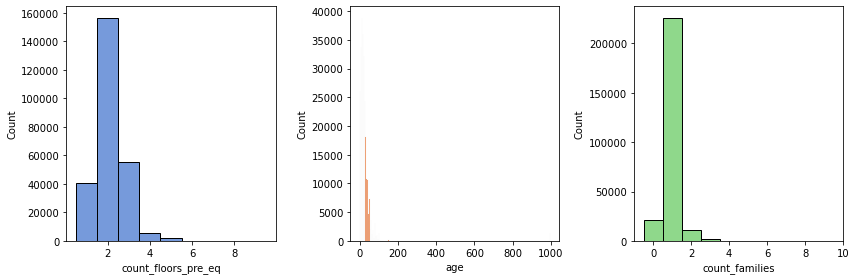

In [13]:
# Plotting distribution of data for discrete features
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
for i in range(len(count_feats)):
    sns.histplot(x=data[count_feats].iloc[:, i].dropna(),
                 ax=axs[i % 3],
                 color=standard_palette[i],
                 discrete=True)

plt.tight_layout()

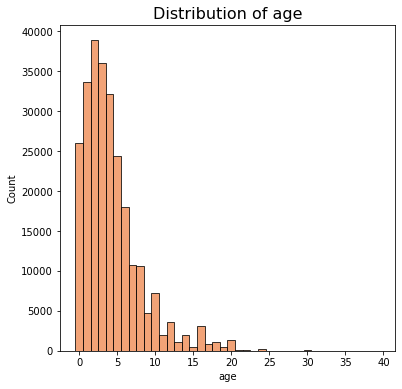

In [14]:
f, axs = plt.subplots(figsize=(6, 6))
r = data[data['age'] < 200]
r = r['age']/5
sns.histplot(x=r, 
             ax=axs, 
             color=standard_palette[1], 
             discrete=True)
plt.title('Distribution of age', size=16)
plt.show()


#### **NOTES FROM (3.3):**

* Significant outliers for `age`. Removal is required.
* Log-transform and scaling by 5 required for `age`.

### 3.6 - Distribution of categorical features

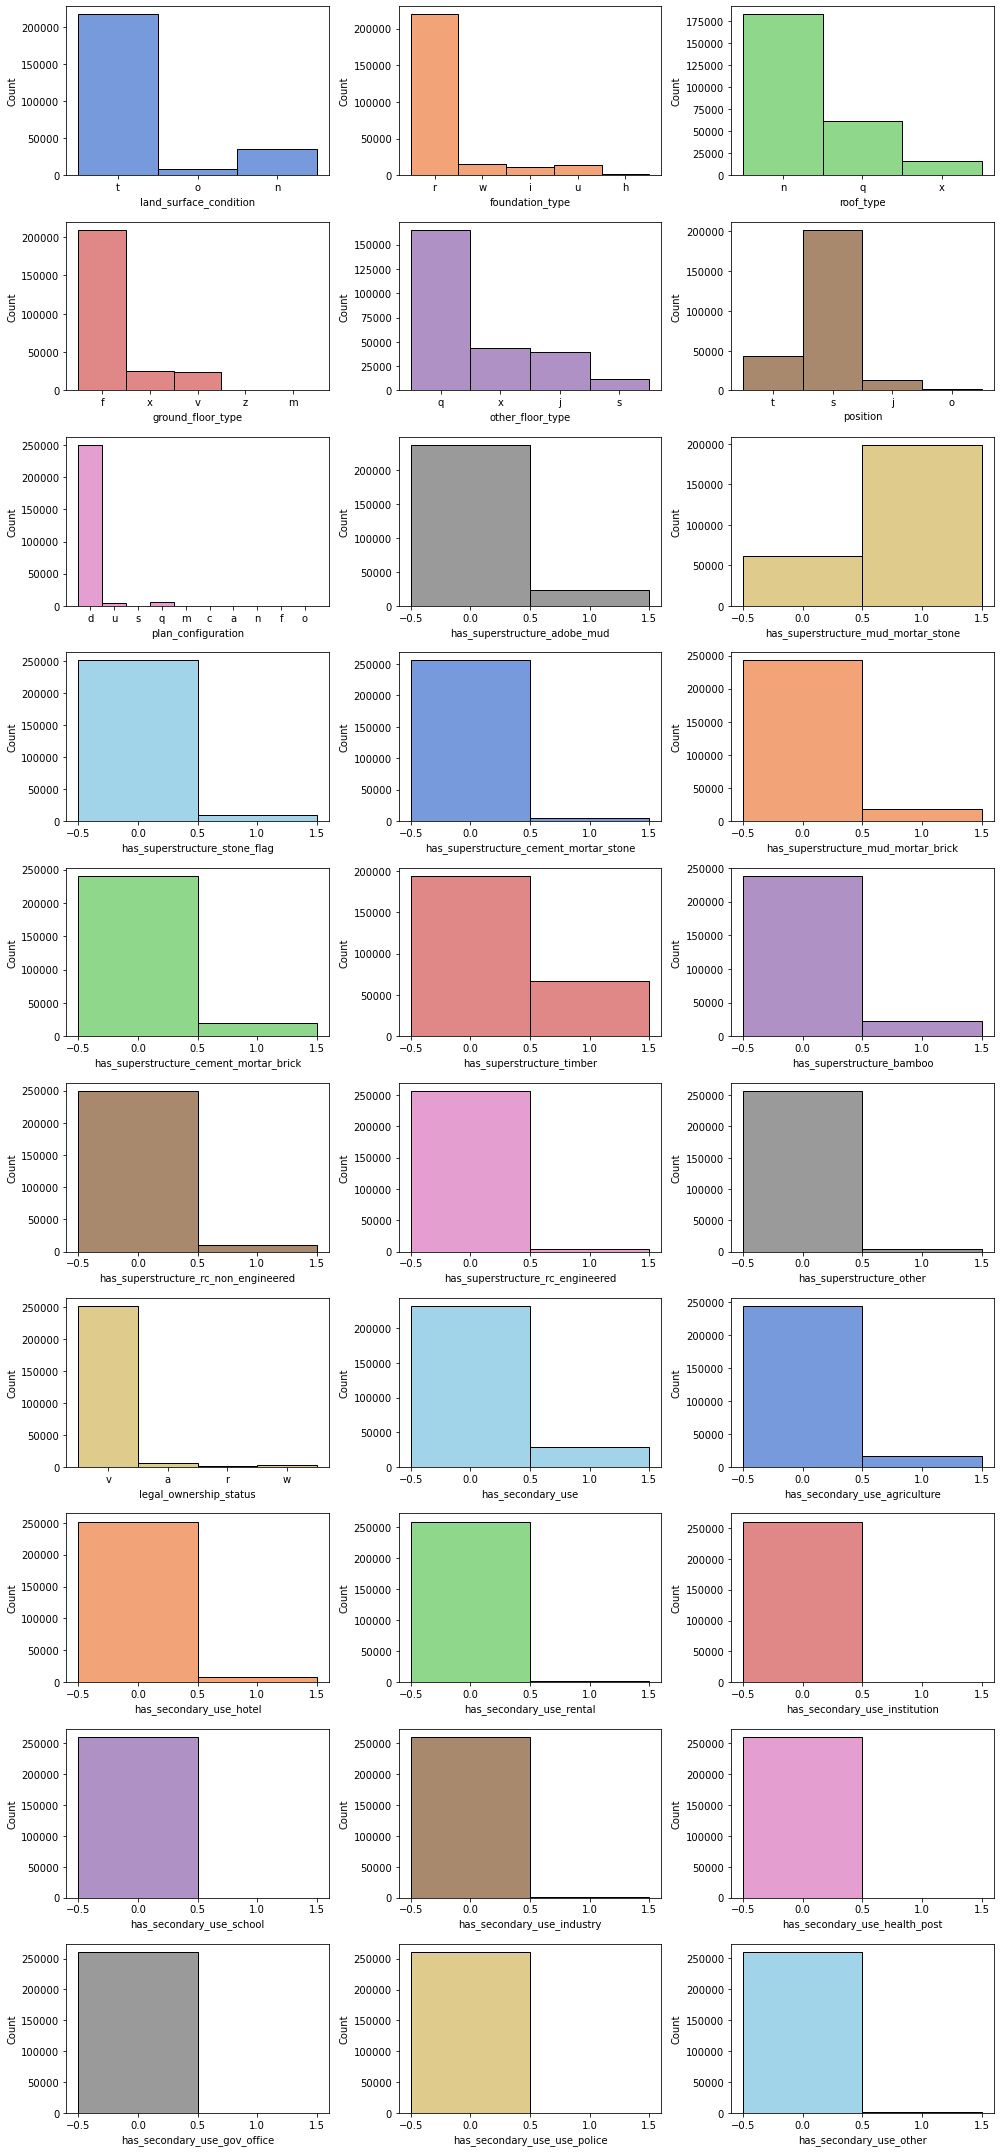

In [15]:
# Plotting distribution of data for categorical features
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(14, 30)
for i in range(len(cat_feats)):
    p = sns.histplot(x=data[cat_feats].iloc[:, i].dropna(),
                     ax=axs[i//3, i % 3], 
                     discrete=True,
                     color=standard_palette[i])
    
plt.tight_layout()


#### **NOTES FROM (3.3):**
* Dummy encoding required for the following variables: `land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`.
* Check class imbalance for binary variables. Consider grouping

### 3.7 - Bivariate analysis of continuous features

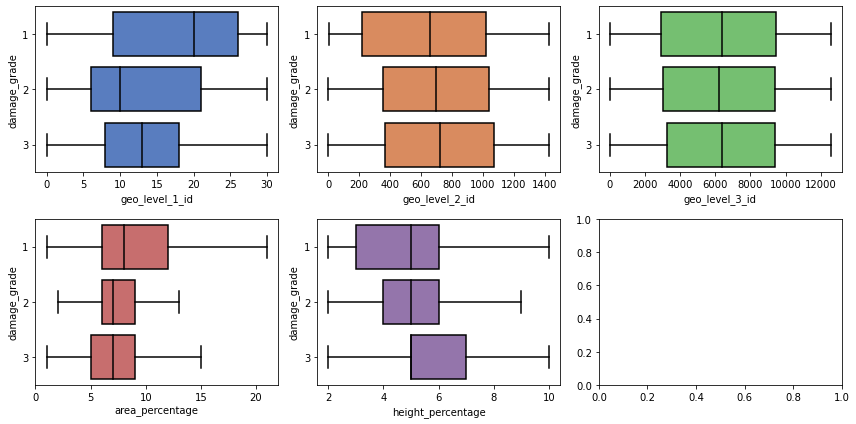

In [16]:
# Plotting scaterrplots of continuous features versus target variable

props = {
    'boxprops': {'edgecolor': 'black'},
    'medianprops': {'color': 'black'},
    'whiskerprops': {'color': 'black'},
    'flierprops': {'color': 'black'},
    'showfliers': False,
    'capprops': {'color': 'black'}
}

fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
for i in range(len((cont_feats))):
    sns.boxplot(x=data[cont_feats].iloc[:, i], 
                y=data['damage_grade'],
                ax=axs[i//3, i % 3],
                orient='h',
                color=standard_palette[i], 
                **props)

plt.tight_layout()

### 3.8 - Bivariate analysis of count features

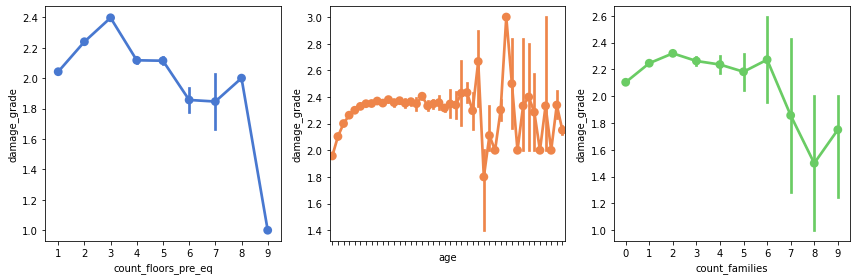

In [17]:
# Plotting mean ln(1+SalePrice) for discrete features
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
for i in range(len(count_feats)):
    p = sns.pointplot(x=data[count_feats].iloc[:, i].dropna(), 
                      y=data['damage_grade'],
                      ax=axs[i % 3],
                      color=standard_palette[i])
    if i in [1]:
        p.set(xticklabels=[])
plt.tight_layout()    

### 3.9 - Bivariate analysis of categorical features

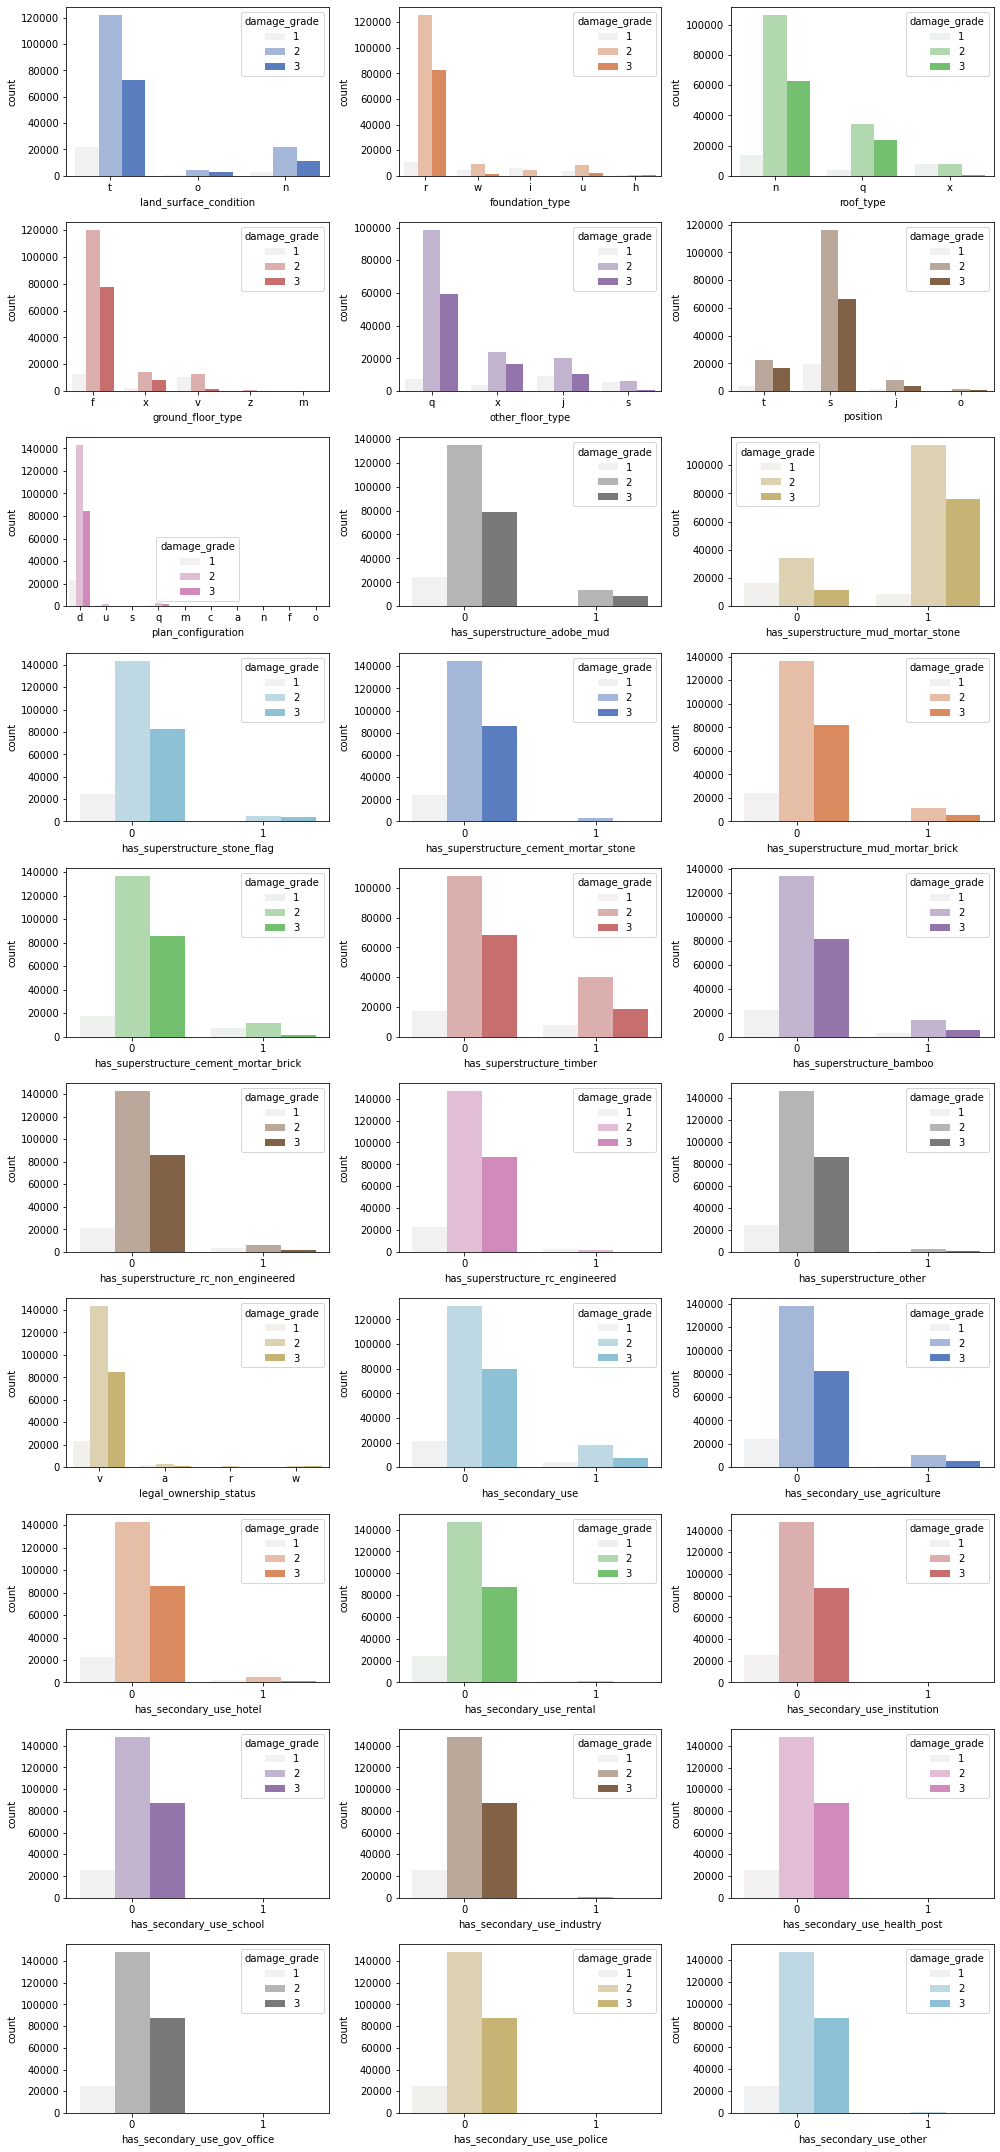

In [21]:
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(14, 30)
for i in range(len(cat_feats)):
    sns.countplot(x=data[cat_feats].iloc[:, i].dropna(), 
                  hue=data['damage_grade'], 
                  ax=axs[i//3, i % 3], 
                  color=standard_palette[i])

plt.tight_layout()

## 4 - Data cleaning and preprocessing

## 5 - Modelling

Possible models:
- Ordered logit
- 

## 6 - Conclusion